---
# INTRO. A LA INTELIGENCIA ARTIFICIAL - PROYECTO FINAL
---


- INTEGRANTES: KEVIN FUENTES N. Y JOSÉ SALGADO M.
- DOCENTE: GABRIEL CABAS M.
- AYUDANTE: NAIRO TORRES F.

---
## PARTE 1 - CARGA DE ARCHIVOS Y ANÁLISIS EXPLORATORIO DE DATOS
---

In [ ]:
# CARGAMOS LAS LIBRERIAS NECESARIAS.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# CARGAMOS EL DATAFRAME Y VISUALIZAMOS PRIMERAS FILAS.

df = pd.read_csv('USA_cars_datasets.csv')
df.head() # OBTENEMOS LAS PRIMERAS 5 FILAS.

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [ ]:
# OBTENER CANTIDAD DE FILAS Y DE COLUMNAS.

print(f'Cantidad de filas: {df.shape[0]}.') 
print(f'Cantidad de columnas: {df.shape[1]}.')

Cantidad de filas: 2499.
Cantidad de columnas: 13.


In [ ]:
# OBTENER EL TIPO DE DATOS DEL DATASET.

df.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [ ]:
# VERIFICAR EXISTENCIA DE VALORES NULOS.

df.isnull().sum().any()

False

In [ ]:
# OBTENER ESTADÍSTICAS BÁSICAS.

df.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


In [ ]:
# CHEKEAMOS CANTIDAD DE VALORES ÚNICOS POR CADA ATRIBUTO.

for column in df.select_dtypes(include='object').columns:
    print(f'{column}: {df[column].nunique()} valores únicos.') # VISUALIZAMOS LA CANTIDAD DE VALORES UNICOS.

brand: 28 valores únicos.
model: 127 valores únicos.
title_status: 2 valores únicos.
color: 49 valores únicos.
vin: 2495 valores únicos.
state: 44 valores únicos.
country: 2 valores únicos.
condition: 47 valores únicos.


<function matplotlib.pyplot.show(close=None, block=None)>

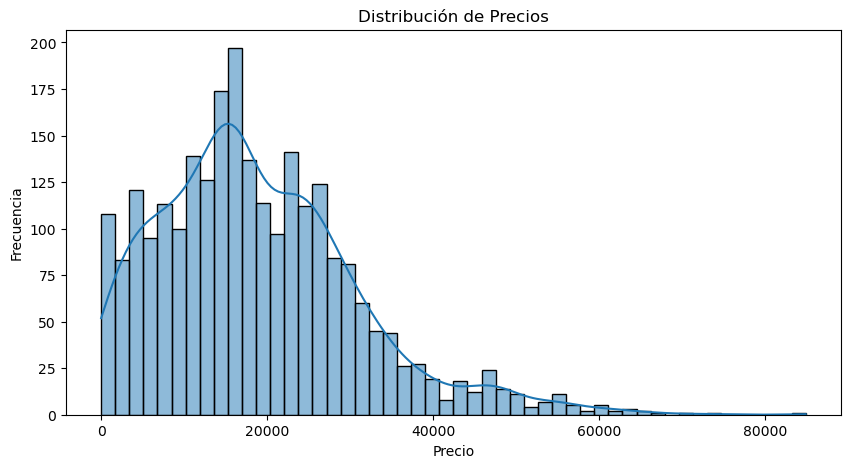

In [ ]:
# GRAFICAMOS HISTOGRAMA DE FRECUENCIA DE PRECIOS.

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='price', bins=50, kde=True) # EL HISTOGRAMA SE REALIZA CON 50 BINS Y CON UNA CURVA KERNEL DENSITY ESTIMATE.
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios')
plt.show

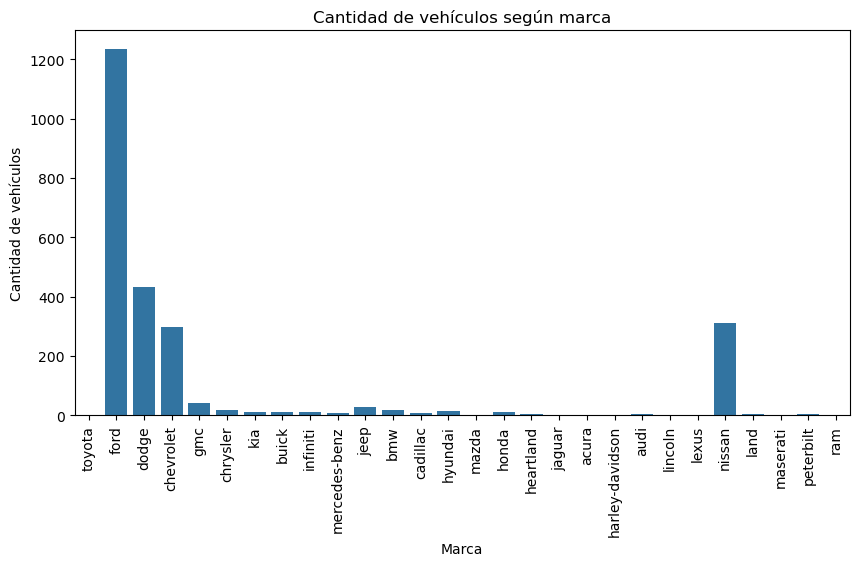

In [ ]:
# GRAFICAMOS LA CANTIDAD DE VEHÍCULOS SEGÚN LA MARCA.

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='brand') # GRAFICOS LA CANTIDAD DE VEHICULOS, SEGUN SU MARCA.
plt.xlabel('Marca')
plt.xticks(rotation=90) # APLICAMOS ROTACIÓN DE LOS TEXTOS.
plt.ylabel('Cantidad de vehículos')
plt.title('Cantidad de vehículos según marca')
plt.show()

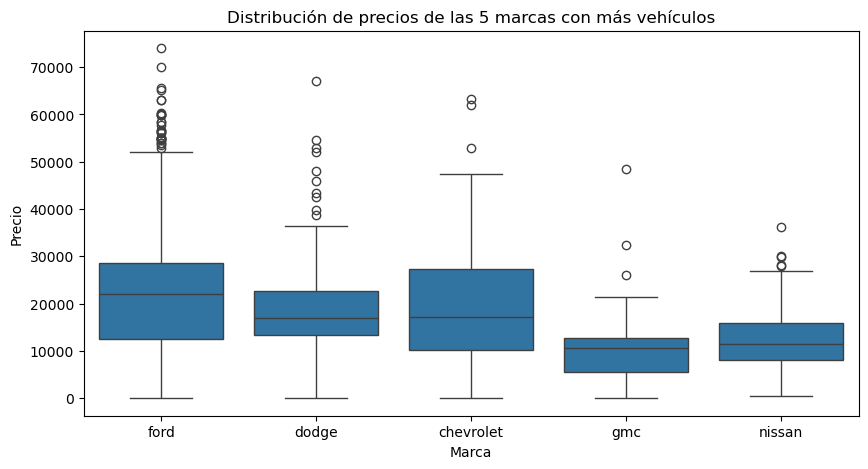

In [94]:
# GRAFICAMOS LA DISTRIBUCIÓN DE PRECIOS DE LAS 5 MARCAS CON MÁS VEHÍCULOS.

top_brands = df['brand'].value_counts().nlargest(5).index # VISUALIZAMOS LAS 5 MARCAS CON MAS VEHICULOS.
plt.figure(figsize=(10,5))
sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='price')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.title('Distribución de precios de las 5 marcas con más vehículos')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

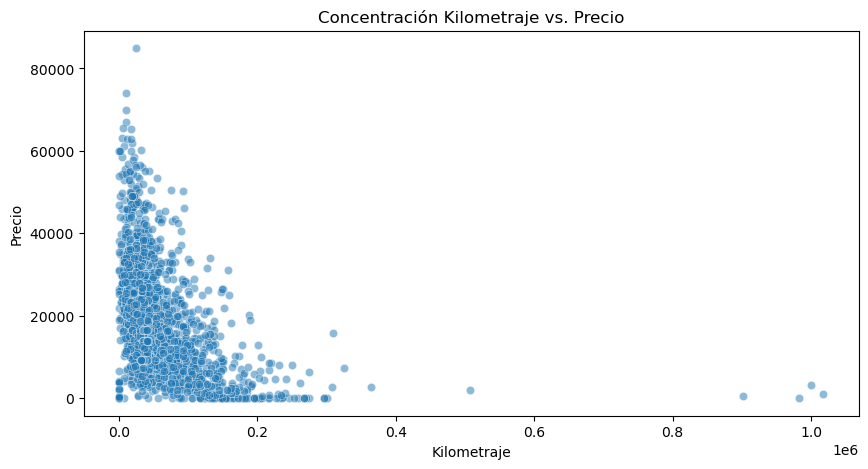

In [95]:
# GRAFICAMOS LA CONCENTRACIÓN DE KILOMETRAJE VS. PRECIO.

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5) # CREAMOS UN GRAFICO QUE EVIDENCIE LA RELACIÓN PRECIO VS KILOMETRAJE CON UNA TRANSPARENCIA DE LOS PUNTOS DEL 50%
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.title('Concentración Kilometraje vs. Precio')
plt.show

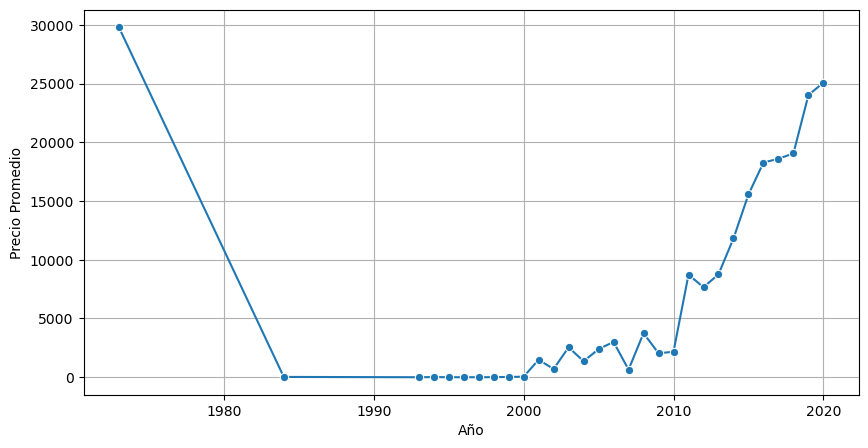

In [96]:
# GRAFICAMOS EL PRECIO PROMEDIO A LO LARGO DE LOS AÑOS.

price_by_year = df.groupby('year')['price'].mean().reset_index() # CALCULAMOS EL PRECIO PROMEDIO DE LOS VEHICULOS POR AÑO.
plt.figure(figsize=(10,5))
sns.lineplot(data=price_by_year, x='year', y='price', marker='o')
plt.xlabel('Año')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()

---
## PARTE 2 - PREPROCESAMIENTO DE DATOS Y ESTANDARIZACIÓN
---

In [97]:
# ELIMINAMOS COLUMNAS IRRELEVANTES.

df = df.drop(columns=['Unnamed: 0', 'title_status', 'color', 'vin', 'lot', 'country', 'condition']) # ELIMINAMOS COLUMNAS QUE NO APORTAN A LOS MODELOS.
print("PRIMERAS FILAS TRAS ELIMINACIÓN DE ATRIBUTOS IRRELEVANTES.")
df.head() # VISUALIZAMOS PARA VERIFICAR LA ELIMINACIÓN.

PRIMERAS FILAS TRAS ELIMINACIÓN DE ATRIBUTOS IRRELEVANTES.


,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida


In [98]:
# IDENTIFICAMOS VARIABLES CATEGÓRICAS QUE REQUIEREN CODIFICACIÓN.

cat_cols = ['brand', 'model', 'state'] # DEFINIMOS LAS COLUMNAS A CODIFICAR.
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col]) # APLICAMOS LA CODIFICACIÓN NUMERICA A CADA COLUMNA CATEGÓRICA.
    
df.head()

,price,brand,model,year,mileage,state
0,6300,27,25,2008,274117.0,24
1,2899,8,92,2011,190552.0,35
2,5350,7,75,2018,39590.0,7
3,25000,8,32,2014,64146.0,39
4,27700,5,0,2018,6654.0,6


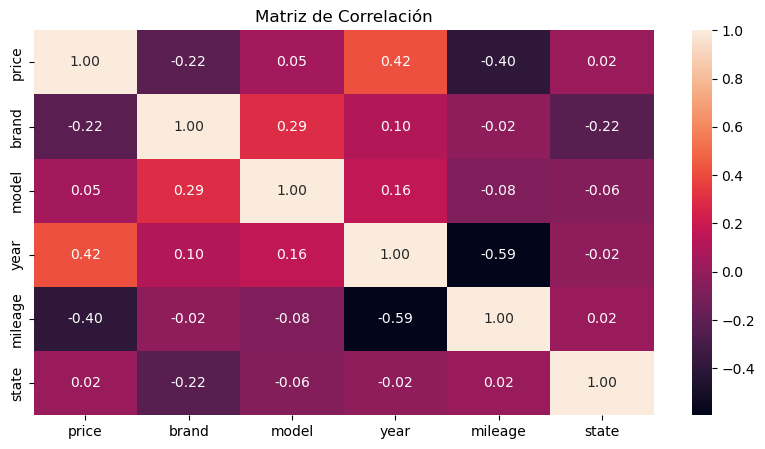

In [99]:
# CALCULAMOS MATRIZ DE CORRELACIÓN.

correlation_matrix = df.corr(numeric_only=True) # CREAMOS UNA MATRIX DE CORRELACIÓN DE LAS VARIABLES NUMÉRICAS.

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f') # DEFINIMOS SOLO 2 DECIMALES.
plt.title('Matriz de Correlación')
plt.show()

In [100]:
# SEPARAMOS LAS VARIABLE OBJETIVO DEL DATAFRAME.

x = df.drop(columns=['price']) 
y = df['price'] # DEFINIMOS LA VARIABLE OBJETIVO A TRABAJAR.

In [101]:
# ESTANDARIZAMOS EL DATAFRAME.

ss = StandardScaler()
x_scaled = ss.fit_transform(x)

---
## PARTE 3 - ENTRENAMIENTO Y EVALUACIÓN DE MODELOS
---

In [102]:
# SEPARAMOS LAS VARIABLES EN ENTRENAMIENTO Y PRUEBA.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42) # DIVIDIMOS LOS DATOS EN UN 80% ENTRENAMIENTO Y UN 20% DE PRUEBA.

In [103]:
# CREAMOS DICCIONARIO PARA ALMACENAR MODELOS Y MÉTRICAS.

resultados_modelos = { # CREAMOS LISTA DE LOS VALORES OBTENIDOS POR LAS METRICAS DE EVALUACIÓN.
    'Modelo': [],
    'MSE': [],
    'MAE': [],
    'R2-score': []
}

In [104]:
# CREAMOS FUNCIÓN PARA EVALUAR MODELOS DE REGRESIÓN Y ALMACENAR DATOS EN DICCIONARIO.

def evaluate_model(model, x_test, y_test, model_name='Modelo'):
    '''
    Esta fucnión evalúa un modelo de regresión y muestra métricas de desempeño.
    Luego, almacena los datos en el diccionario creado para una posterior comparación.

    Parámetros:
        model: El modelo de regresión entrenado.
        x_test: El conjunto de datos de prueba.
        y_test: Las etiquetas reales del conjunto de prueba.
        model_name: Nombre tipo string del modelo, usado para los outputs.
    '''

    # OBTENEMOS EL VALOR DE PREDICCIÓN.
    y_pred = model.predict(x_test)

    # SE REGISTRAN LAS MÉTRICAS.
    metricas = {
        'MSE': mean_squared_error(y_test, y_pred), # CALCULAMOS EL ERROR CUADRÁTICO MEDIO.
        'MAE': mean_absolute_error(y_test, y_pred), # CALCULAMOS EL ERROR ABSOLUTO MEDIO.
        'R2-score': r2_score(y_test, y_pred) # CALCULAMOS EL COEFICIENTE DE DETERMINACIÓN.
    }

    # SE ALMACENAN LOS MODELOS Y MÉTRICAS.
    resultados_modelos['Modelo'].append(model_name)
    resultados_modelos['MSE'].append(metricas['MSE'])
    resultados_modelos['MAE'].append(metricas['MAE'])
    resultados_modelos['R2-score'].append(metricas['R2-score'])

    # SE VISUALIZAN LOS RESULTAODS OBTENIDOS DEL MOODELO.
    print(f'\nEvaluación del modelo {model_name}.')
    for metric, value in metricas.items():
        print(f'{metric}: {value:.4f}')

    # SE GRAFICAN LOS MODELOS.
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel("Valor Real")
    plt.ylabel("Predicción")
    plt.title(f"{model_name} - Real vs. Predicción")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Evaluación del modelo Linear Regression.
MSE: 111986607.9327
MAE: 7850.0376
R2-score: 0.2934


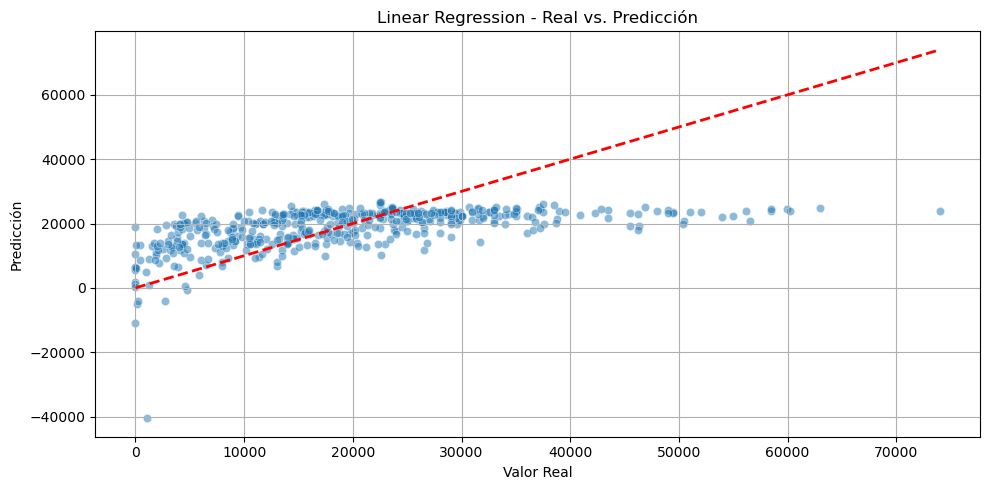

In [105]:
# IMPLEMENTAMOS, ENTRENAMOS Y EVALUAMOS MODELO LINEAR REGRESSION.

lr = LinearRegression() 
lr.fit(x_train, y_train) # ENTRENAMOS EL MODELO CON LO DATOS DE ENTRENAMIENTO.

evaluate_model(lr, x_test, y_test, 'Linear Regression') # EVALUAMOS EL MODELO.


Evaluación del modelo Random Forest Regressor.
MSE: 49937531.5884
MAE: 4552.4240
R2-score: 0.6849


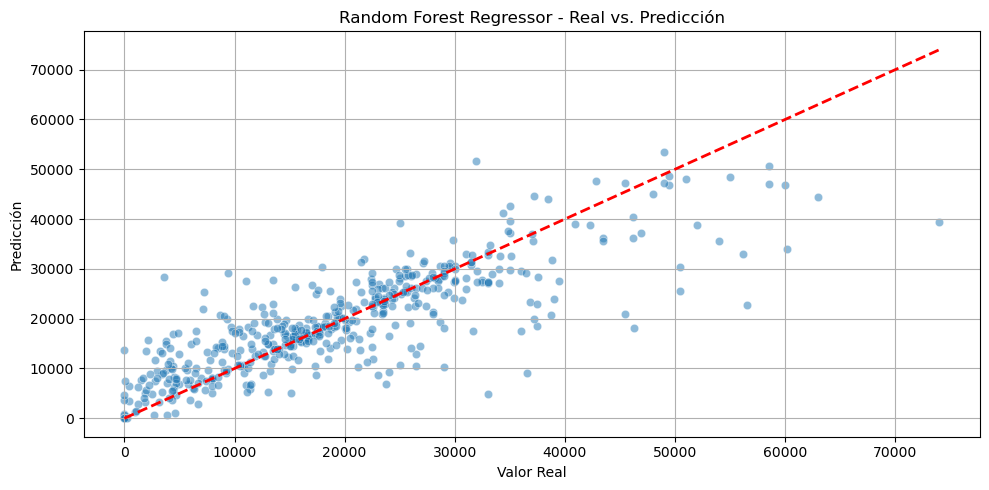

In [106]:
# IMPLEMENTAMOS, ENTRENAMOS Y EVALUAMOS MODELO RANDOM FOREST REGRESSOR.

rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train, y_train) # ENTRENAMOS EL MODELO CON LO DATOS DE ENTRENAMIENTO.

evaluate_model(rfr, x_test, y_test, 'Random Forest Regressor') # EVALUAMOS EL MODELO.


Evaluación del modelo KNN Regressor.
MSE: 66550004.2482
MAE: 5508.6904
R2-score: 0.5801


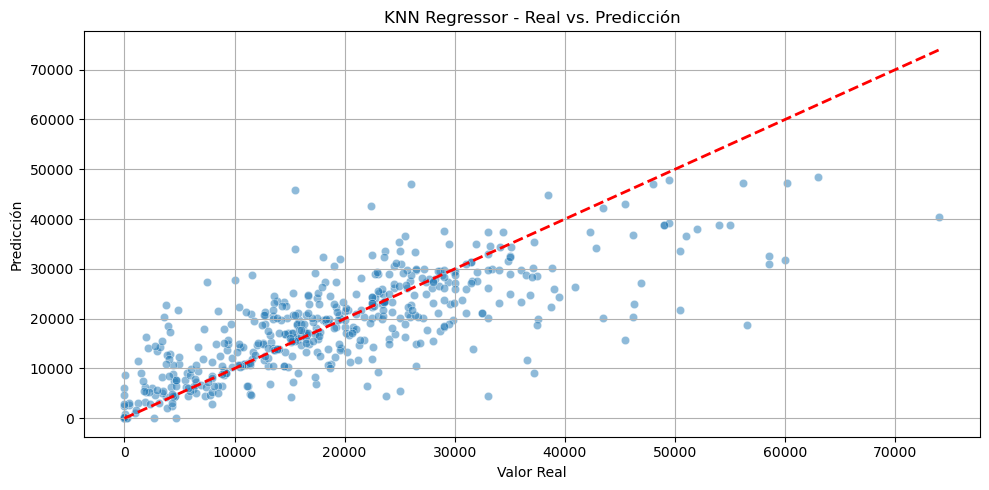

In [107]:
# IMPLEMENTAMOS, ENTRENAMOS Y EVALUAMOS MODELO KNN REGRESSOR.

knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(x_train, y_train) # ENTRENAMOS EL MODELO CON LO DATOS DE ENTRENAMIENTO.

evaluate_model(knnr, x_test, y_test, 'KNN Regressor') # EVALUAMOS EL MODELO.

---
## PARTE 4 - COMPARACIÓN FINAL DE MODELOS Y CONCLUSIÓN
---

In [108]:
# CREAMOS Y VISUALIZAMOS TABLA CON MODELOS Y MÉTRICAS OBTENIDAS.

df_resultados = pd.DataFrame(resultados_modelos) 
print('TABLA RESUMEN DE MODELOS ENTRENADOS Y MÉTRICAS REGISTRADAS.')
display(df_resultados) # VISUALIZAMOS LOS RESULTADOS DE LAS METRICAS EN LOS MODELOS.

TABLA RESUMEN DE MODELOS ENTRENADOS Y MÉTRICAS REGISTRADAS.


,Modelo,MSE,MAE,R2-score
0,Linear Regression,1.119866e+08,7850.03758,0.293429
1,Random Forest Regressor,4.993753e+07,4552.42402,0.684923
2,KNN Regressor,6.655000e+07,5508.69040,0.580108


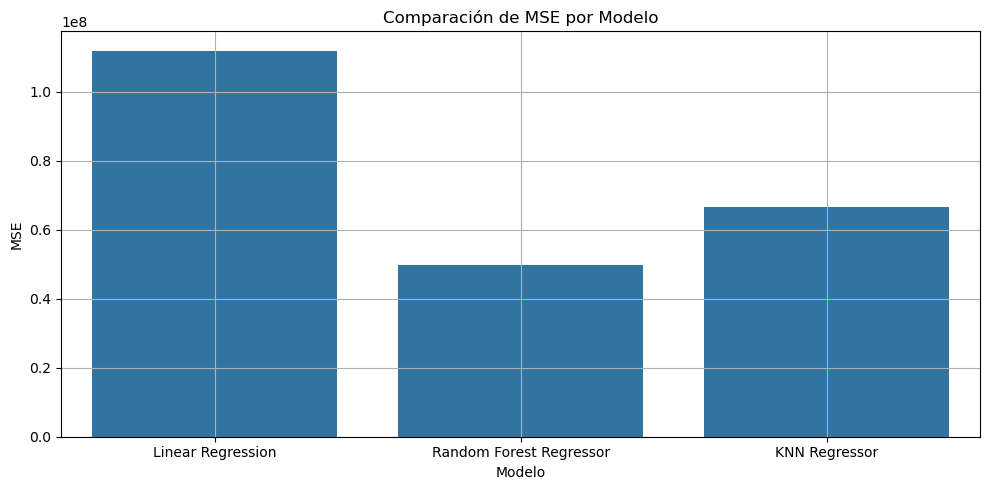

In [109]:
# CREAMOS UN GRÁFICO COMPARATIVO DE LOS MODELOS EN LA MÉTRICA MSE.

plt.figure(figsize=(10, 5))
sns.barplot(data=df_resultados, x='Modelo', y='MSE')
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de MSE por Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()

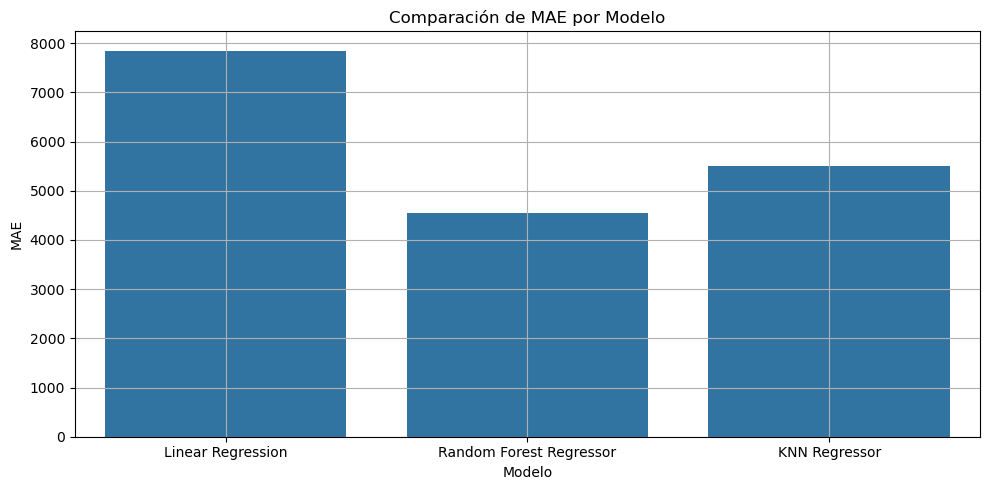

In [110]:
# CREAMOS UN GRÁFICO COMPARATIVO DE LOS MODELOS EN LA MÉTRICA MAE.

plt.figure(figsize=(10, 5))
sns.barplot(data=df_resultados, x='Modelo', y='MAE')
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.title('Comparación de MAE por Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()

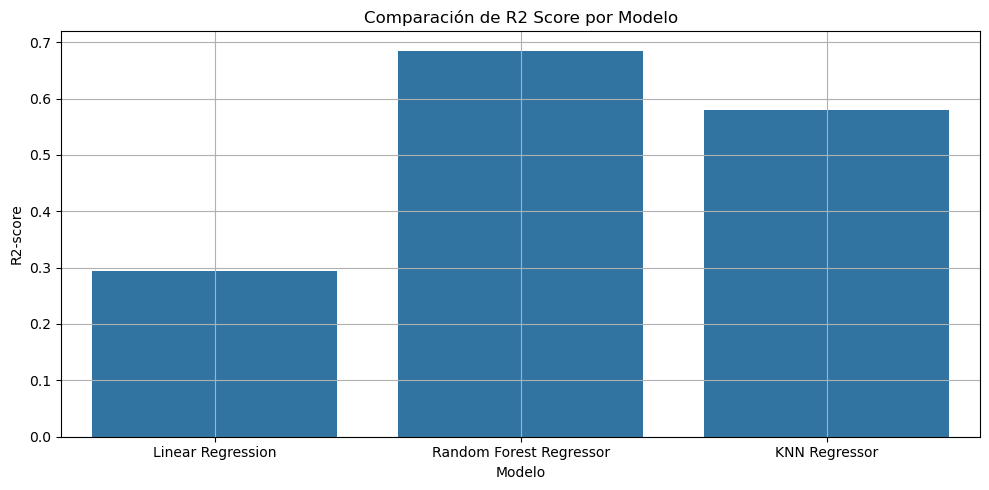

In [111]:
# CREAMOS UN GRÁFICO COMPARATIVO DE LOS MODELOS EN LA MÉTRICA R2-SCORE.

plt.figure(figsize=(10, 5))
sns.barplot(data=df_resultados, x='Modelo', y='R2-score')
plt.xlabel('Modelo')
plt.ylabel('R2-score')
plt.title('Comparación de R2 Score por Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()